<a href="https://colab.research.google.com/github/MaxVieiraSantiago/Machine-Learning-Algorithms/blob/master/Linear%20Regression/Regress%C3%A3o_Vetorial_Suporte.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Regressão Support Vector Machine - SVM**

In [3]:
import numpy as np
import pandas as pd

### **Importação do Dataset Iris**

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

In [4]:
colnames = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

In [5]:
iris = pd.read_csv(url, names=colnames)

In [5]:
iris.head()

,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
iris.shape

(150, 5)

#### **Separação dos Atriutos**

In [6]:
X = iris.drop('Class', axis=1)
y = iris['Class']

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#### **Modelo de Regressão Vetorial de Suporte ( Kernel = Linear )**

In [23]:
from sklearn.svm import SVC
svcClassifier = SVC(kernel='linear')
svcClassifier.fit(X_train, y_train);

In [24]:
y_pred = svcClassifier.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print( classification_report(y_test, y_pred) )

#### **Modelo de Regressão Vetorial de Suporte ( Kernel = Sigmóide )**

In [18]:
from sklearn.svm import SVC
svcClassifier = SVC(kernel="sigmoid")
svcClassifier.fit(X_train, y_train);

In [19]:
y_pred = svcClassifier.predict(X_test)

In [20]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))

[[ 0  0 16]
 [ 0  0 18]
 [ 0  0 11]]


#### **Modelo de Regressão Vetorial de Suporte ( Kernel = Polinomial )**

In [14]:
from sklearn.svm import SVC
svcClassifier = SVC(kernel='poly', degree=3)
svcClassifier.fit(X_train, y_train);

In [15]:
y_pred = svcClassifier.predict(X_test)

In [16]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


#### **Modelo de Regressão Vetorial de Suporte ( Kernel = Gaussiana (rbf) )**

In [20]:
from sklearn.svm import SVC
svcClassifier = SVC(kernel='rbf')
svcClassifier.fit(X_train, y_train);

In [21]:
y_pred = svcClassifier.predict(X_test)

In [22]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))

[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]


# **Regressão Vetorial de Suporte: Opção à Regressão Linear Múltipla**

In [4]:
file = '/content/drive/MyDrive/Udemy/enem_2019_tratado.csv'
enem = pd.read_csv( file, sep=',', encoding='iso-8859-1' )

## **Análise Inicial**

In [4]:
enem.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
0,"1,90E+11",Santa Isabel,22,M,1,parda,1,1,não_respondeu,NaN,...,600.2,Inglês,1.0,160.0,200.0,180.0,200.0,200.0,940.0,Sim
1,"1,90E+11",São Paulo,17,F,1,parda,1,2,privada,15567761.0,...,731.8,Inglês,1.0,160.0,120.0,200.0,200.0,200.0,880.0,Não
2,"1,90E+11",São Bernardo do Campo,19,M,1,parda,1,2,pública,35904958.0,...,393.2,Espanhol,1.0,80.0,160.0,120.0,100.0,100.0,560.0,Sim
3,"1,90E+11",Embu-Guaçu,17,F,1,parda,1,2,pública,NaN,...,419.2,Inglês,1.0,120.0,120.0,120.0,120.0,80.0,560.0,Sim
4,"1,90E+11",Guarulhos,23,F,1,branca,1,1,não_respondeu,NaN,...,796.1,Inglês,1.0,160.0,200.0,180.0,180.0,160.0,880.0,Sim


In [30]:
enem.shape

(499940, 28)

**Objetivo: criar um modelo matemático para prever a nota de redação tendo como variáveis independentes as notas de seus componentes.**

##### **Selecionando apenas um dos colégios**

In [5]:
colegiox = enem.loc[ enem['CO_ESCOLA'] == 35132287 ]

In [6]:
colegiox.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET
17,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,49.1,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim
10760,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,930.5,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim
13315,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,663.9,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim
20006,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,771.9,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim
26697,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,663.1,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim


In [ ]:
colegiox.shape

##### **Valores Missing**

In [ ]:
colegiox.isnull().sum()

In [ ]:
# Tipos de Atributos
colegiox.dtypes

##### **Separando as Variáveis**

In [6]:
Xfeatures = ['COMP2', 'COMP4', 'COMP5']
X = colegiox[Xfeatures]
X.head()

,COMP2,COMP4,COMP5
17,140.0,160.0,160.0
10760,200.0,200.0,140.0
13315,140.0,200.0,120.0
20006,180.0,180.0,140.0
26697,200.0,200.0,200.0


In [7]:
y = colegiox[['NOTA_REDACAO']]
y.head()

,NOTA_REDACAO
17,760.0
10760,920.0
13315,780.0
20006,800.0
26697,960.0


### **Usando a Máquina de Vetor de Suporte para Regressão**

In [10]:
# kernell = 'linear', 'rbf', 'poly', 'sigmoid'
from sklearn.svm import SVR
svrRegressor = SVR(kernel='linear')
svrRegressor.fit(X, y);

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [11]:
svrRegressor.score(X, y)

0.9199447922023846

In [ ]:
y_pred = svrRegressor.predict(X)
y_pred

In [13]:
svrRegressor.coef_

array([[1.25000074, 1.90500401, 1.03498723]])

In [14]:
svrRegressor.intercept_

array([122.10151882])

In [15]:
print("Equação: NOTA REDAÇÃO = {:.2f} + {:.2f}*COMP2 + {:.2f}*COMP4 + {:.2f}*COMP5".format(svrRegressor.intercept_[0],
                                                                                           svrRegressor.coef_[0][0],
                                                                                           svrRegressor.coef_[0][1],
                                                                                           svrRegressor.coef_[0][2]))

Equação: NOTA REDAÇÃO = 122.10 + 1.25*COMP2 + 1.91*COMP4 + 1.03*COMP5


## **Métricas**

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Erro Médio Absoluto
print("Mean Absolute Error: {:.2f}".format(mean_absolute_error(y, y_pred)))

# Erro Quadrático Médio
print("Mean Squared Error: {:.2f}".format(mean_squared_error(y, y_pred)))

# Raiz do Erro Quadrátido Médio (RMSE)
print("RMSE: {:.2f}".format( np.sqrt(mean_squared_error(y, y_pred) )))

Mean Absolute Error: 19.40
Mean Squared Error: 668.33
RMSE: 25.85


## **Previsão**

In [ ]:
previsoes = pd.DataFrame( y_pred, columns = ['previsoes'])
previsoes

In [18]:
# Vai resetar a coluna de índices, o drop=True é para tirar o index antigo que fica mantido
colegiox.reset_index(inplace=True, drop=True)

In [ ]:
colegiox.head()

In [19]:
colegioX02 = pd.concat([ colegiox, previsoes ], axis=1)

In [20]:
colegioX02.head()

,NU_INSCRICAO,NO_MUNICIPIO_RESIDENCIA,IDADE,SEXO,TP_ESTADO_CIVIL,RACA,TP_NACIONALIDADE,TP_ST_CONCLUSAO,ESCOLA,CO_ESCOLA,...,TP_LINGUA,TP_STATUS_REDACAO,COMP1,COMP2,COMP3,COMP4,COMP5,NOTA_REDACAO,INTERNET,previsoes
0,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,140.0,160.0,160.0,760.0,Sim,767.500221
1,"1,90E+11",São Paulo,17,M,1,parda,1,2,privada,35132287.0,...,Inglês,1.0,180.0,200.0,200.0,200.0,140.0,920.0,Sim,898.000681
2,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,140.0,160.0,200.0,120.0,780.0,Sim,802.300892
3,"1,90E+11",São Paulo,17,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,140.0,180.0,160.0,180.0,140.0,800.0,Sim,834.900586
4,"1,90E+11",São Paulo,18,F,1,branca,1,2,privada,35132287.0,...,Inglês,1.0,160.0,200.0,200.0,200.0,200.0,960.0,Sim,960.099915


In [21]:
import seaborn as sns

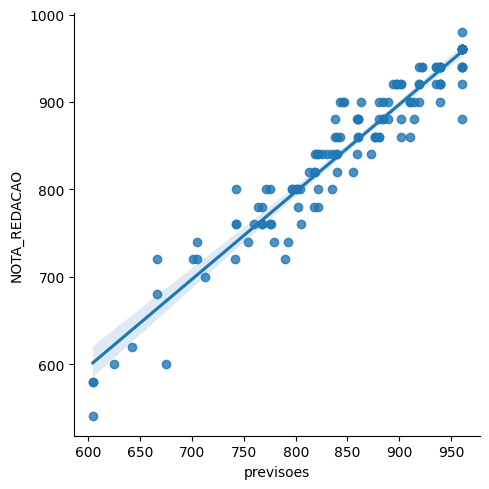

In [22]:
sns.lmplot(data=colegioX02, x='previsoes', y='NOTA_REDACAO')

In [ ]:
nota_redacao = svrRegressor.predict([[140, 160, 160]])
nota_redacao

# **SVR com Escalonamento**

##### **Padronização de Escala**

In [23]:
from sklearn.preprocessing import StandardScaler

escalax = StandardScaler()
independente_escala = escalax.fit_transform(X)

In [ ]:
# Média -> ~0
# Desvio Padrão -> ~1
independente_escala

In [26]:
escalay = StandardScaler()
dependente_escala = escalay.fit_transform(y)

In [33]:
from sklearn.svm import SVR

SVRClassifier02 = SVR(kernel='linear')
SVRClassifier02.fit(independente_escala, dependente_escala.ravel());

# ravel() é para retornar matriz 1D

In [34]:
SVRClassifier02.score(independente_escala, dependente_escala)

0.9222815652435888

In [ ]:
previsoes_escala = SVRClassifier02.predict(independente_escala)
previsoes_escala

In [ ]:
dependente_escala

##### **Revertendo a Transformação**

In [ ]:
dependente_inverse = escalay.inverse_transform(dependente_escala)
previsoese_inverse = escalax.inverse_transform(previsoes_escala.reshape(-1, 1))